In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import spearmanr
from scipy import stats

In [3]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [6]:
df = df.dropna(axis = 0)
df.shape

(112925, 17)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [8]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


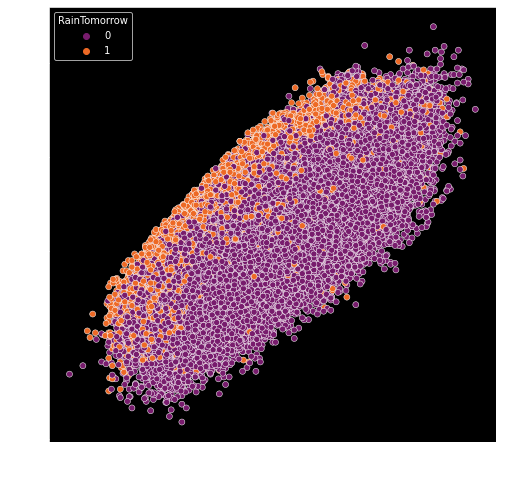

In [82]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

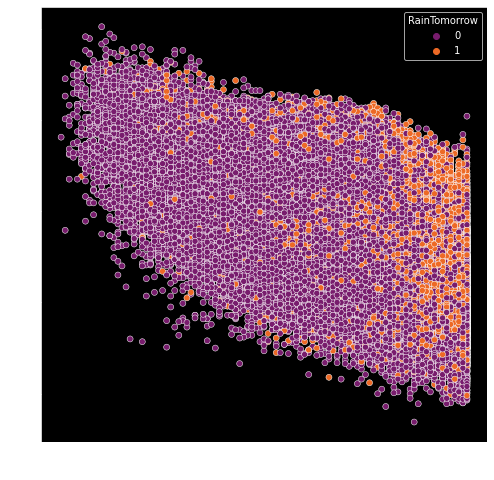

In [83]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

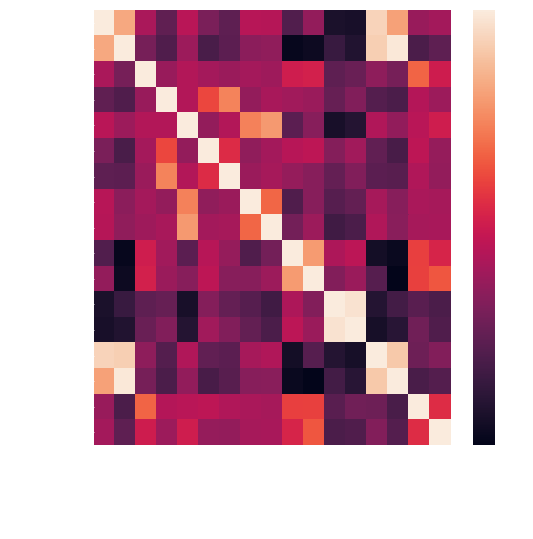

In [84]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr())

In [9]:
x= df.iloc[:,0:16].values


In [10]:
y= df.iloc[:,16].values

In [11]:
print(x)

[[13.4 22.9  0.6 ... 16.9 21.8  0. ]
 [ 7.4 25.1  0.  ... 17.2 24.3  0. ]
 [12.9 25.7  0.  ... 21.  23.2  0. ]
 ...
 [ 3.6 25.3  0.  ... 10.9 24.5  0. ]
 [ 5.4 26.9  0.  ... 12.5 26.1  0. ]
 [ 7.8 27.   0.  ... 15.1 26.   0. ]]


In [12]:
print(y)

[0 0 0 ... 0 0 0]


In [68]:
forPCC= SelectKBest(score_func=f_regression, k=1)

In [69]:
XselforPCC= forPCC.fit_transform(x, y)
print(XselforPCC)
print(XselforPCC.shape)

[[22.]
 [25.]
 [30.]
 ...
 [21.]
 [24.]
 [24.]]
(112925, 1)


In [70]:
newdf=pd.DataFrame(XselforPCC)
print(newdf)

           0
0       22.0
1       25.0
2       30.0
3       16.0
4       33.0
...      ...
112920  27.0
112921  24.0
112922  21.0
112923  24.0
112924  24.0

[112925 rows x 1 columns]


In [71]:
newdf1=pd.DataFrame(y)
new_dataset = pd.concat([newdf, newdf1], axis=1)
print(new_dataset)

           0  0
0       22.0  0
1       25.0  0
2       30.0  0
3       16.0  0
4       33.0  0
...      ... ..
112920  27.0  0
112921  24.0  0
112922  21.0  0
112923  24.0  0
112924  24.0  0

[112925 rows x 2 columns]


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)



In [73]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
lr_score = model.score(x_test, y_test)*100
print("LogisticRegression Accuracy:", lr_score)

LogisticRegression Accuracy: 84.61243284727551


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [74]:
#DecisionTree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(x_train,y_train)
dt_score=dclf.score(x_test,y_test)*100
print("Decision Tree Algorithm Score:",dt_score)

Decision Tree Algorithm Score: 78.74431784638999


In [75]:
#RANDOM_FOREST
clf = RandomForestClassifier(n_estimators= 100, random_state = 0, n_jobs = -1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
rf_score = accuracy_score(y_test,y_pred)*100
print("Random Forest Accuracy:", rf_score)

Random Forest Accuracy: 85.8551272212055


In [76]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(x_train, y_train)
# knn.fit(X_train,y_train)
knn_score = classifier.score(x_test,y_test)*100
print("KNN Algorithm Score:", knn_score)

KNN Algorithm Score: 85.1821240923313


In [77]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bng = BernoulliNB()
bng.fit(x_train, y_train)
nb_score = bng.score(x_test, y_test)*100
print("Naive Bayes Accuracy:", nb_score)

Naive Bayes Accuracy: 76.16152075092981


In [78]:
#Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
mlp_score = mlp.score(x_test, y_test)*100
print("Multi Layer Perceptron Accuracy:", mlp_score)

Multi Layer Perceptron Accuracy: 83.43172560363658


In [79]:
#XGboost
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
xgb_score = accuracy_score(y_test,pred)*100
print('XGboost Accuracy',xgb_score)


XGboost Accuracy 85.33561603400437


In [80]:
print("Random Forest Accuracy:", rf_score)
print("KNN Algorithm Score:", knn_score)
print('xgboost accuracy',xgb_score)
print("LogisticRegression Accuracy:", lr_score)
print("Multi Layer Perceptron Accuracy:", mlp_score)
print("Decision Tree Algorithm Score:",dt_score)
print("Naive Bayes Accuracy:", nb_score)


Random Forest Accuracy: 85.8551272212055
KNN Algorithm Score: 85.1821240923313
xgboost accuracy 85.33561603400437
LogisticRegression Accuracy: 84.61243284727551
Multi Layer Perceptron Accuracy: 83.43172560363658
Decision Tree Algorithm Score: 78.74431784638999
Naive Bayes Accuracy: 76.16152075092981


In [81]:
accuracy = [knn_score, dt_score, rf_score, lr_score, xgb_score, nb_score, mlp_score]
highest_accuracy = max(accuracy)
lowest_accuracy = min(accuracy)
avg = sum(accuracy)/ len(accuracy)
print(accuracy.index(highest_accuracy))
print("Highest Accuracy is ", highest_accuracy)
print(accuracy.index(lowest_accuracy))
print("Lowest Accuracy is ", lowest_accuracy)
print("Average Accuracy is ", avg)

2
Highest Accuracy is  85.8551272212055
5
Lowest Accuracy is  76.16152075092981
Average Accuracy is  82.76040919939615
